# Relationships in Data

## Imports

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Patterns over time

### Importing DateTime data

In [3]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv('../data/divorce.csv', parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


### Updating data type to DateTime

In [4]:
# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce['marriage_date'])

### Visualizing relationships over time

In [5]:
# Define the marriage_year column
divorce["marriage_year"] = divorce['marriage_date'].dt.year

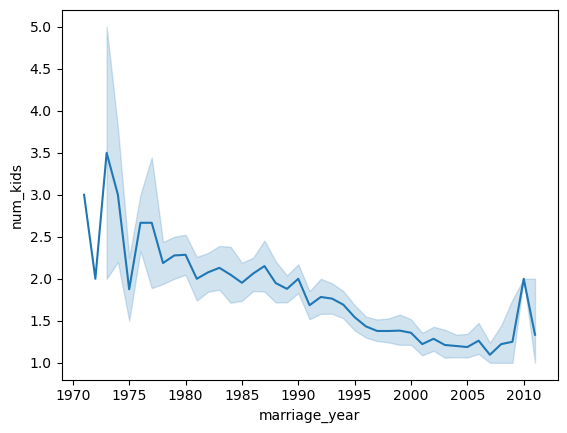

In [9]:
# Create a line plot showing the average number of kids by year
sns.lineplot(
    data=divorce,
    x='marriage_year',
    y='num_kids'
)

plt.show()

## Correlation

### Visualizing variable relationships

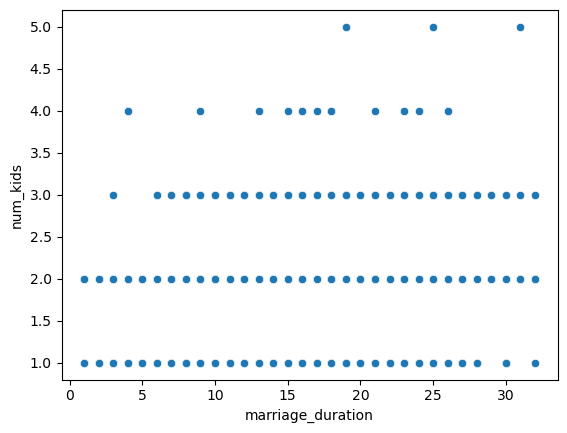

In [11]:
# Create the scatterplot
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids')
plt.show()

### Visualizing multiple variable relationships

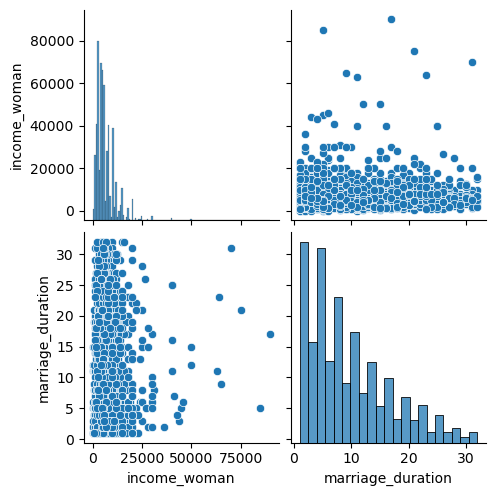

In [13]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=['income_woman', 'marriage_duration'])
plt.show()

## Factor relationships and distributions

### Categorial data in scatter plots

In [15]:
divorce['woman_age_marriage'] = [
    17, 24, 30, 25, 19, 26, 22, 26, 22, 30, 25, 19, 26, 29, 22, 21, 31, 20, 23, 
    37, 30, 24, 21, 23, 32, 22, 27, 34, 20, 26, 25, 25, 30, 23, 23, 22, 21, 29, 
    33, 24, 20, 18, 21, 22, 31, 26, 21, 21, 26, 18, 25, 27, 24, 22, 26, 28, 26, 
    25, 24, 29, 23, 26, 23, 41, 24, 26, 21, 24, 23, 17, 31, 27, 23, 25, 21, 25, 
    25, 32, 29, 25, 18, 24, 21, 27, 33, 23, 30, 21, 22, 23, 29, 29, 23, 21, 19, 
    24, 21, 24, 24, 41, 26, 19, 27, 34, 26, 31, 29, 20, 25, 21, 27, 20, 22, 23, 
    32, 22, 17, 19, 24, 29, 26, 19, 24, 35, 22, 26, 32, 29, 23, 29, 28, 28, 34, 
    37, 28, 30, 21, 23, 26, 24, 30, 24, 14, 26, 32, 25, 26, 29, 26, 26, 29, 26, 
    21, 49, 33, 33, 26, 26, 20, 29, 21, 24, 25, 33, 22, 20, 20, 34, 28, 27, 24, 
    22, 29, 24, 29, 21, 26, 27, 16, 22, 31, 27, 18, 22, 21, 20, 25, 20, 27, 22, 
    23, 23, 18, 25, 26, 19, 30, 21, 46, 22, 29, 22, 28, 30, 36, 25, 22, 30, 26, 
    22, 21, 21, 41, 22, 17, 27, 25, 29, 26, 35, 29, 20, 28, 23, 23, 18, 23, 22, 
    22, 23, 28, 27, 44, 21, 44, 26, 28, 22, 35, 23, 22, 31, 26, 30, 28, 18, 21, 
    33, 34, 21, 24, 27, 20, 20, 20, 22, 33, 18, 34, 26, 32, 49, 27, 25, 24, 20, 
    19, 25, 30, 24, 25, 21, 21, 22, 23, 22, 19, 16, 28, 18, 22, 24, 25, 29, 24, 
    22, 18, 23, 30, 26, 21, 21, 26, 25, 19, 28, 16, 41, 20, 22, 17, 28, 38, 18, 
    15, 23, 22, 31, 22, 25, 32, 26, 22, 19, 38, 29, 25, 28, 24, 20, 24, 21, 21, 
    19, 20, 20, 26, 23, 34, 19, 27, 27, 23, 23, 25, 24, 24, 23, 31, 20, 22, 20, 
    23, 32, 19, 26, 28, 27, 28, 20, 23, 22, 26, 25, 26, 24, 27, 21, 25, 25, 30, 
    22, 22, 21, 23, 28, 25, 19, 28, 24, 21, 28, 22, 43, 22, 19, 24, 20, 26, 33, 
    23, 25, 22, 31, 26, 29, 16, 17, 18, 38, 22, 40, 22, 23, 16, 18, 25, 26, 20, 
    24, 22, 23, 31, 21, 21, 33, 18, 24, 21, 29, 24, 28, 28, 20, 20, 31, 21, 26, 
    25, 24, 29, 26, 33, 16, 27, 34, 25, 24, 22, 30, 26, 27, 19, 24, 20, 31, 25, 
    30, 24, 20, 26, 25, 18, 18, 29, 20, 19, 22, 21, 28, 20, 21, 23, 28, 35, 20, 
    21, 17, 22, 20, 28, 16, 19, 35, 24, 18, 18, 20, 24, 28, 24, 23, 33, 22, 23, 
    21, 45, 28, 19, 24, 31, 26, 17, 22, 27, 42, 24, 22, 21, 21, 30, 34, 20, 30, 
    19, 30, 24, 22, 25, 22, 21, 33, 33, 22, 28, 23, 24, 25, 18, 20, 20, 28, 23, 
    26, 24, 22, 29, 16, 34, 23, 26, 14, 39, 22, 27, 22, 27, 31, 19, 25, 29, 23, 
    22, 32, 28, 20, 19, 32, 22, 21, 25, 19, 25, 20, 25, 26, 29, 22, 24, 30, 22, 
    22, 26, 20, 18, 25, 24, 23, 40, 34, 22, 18, 18, 22, 31, 22, 28, 24, 29, 24, 
    32, 28, 23, 33, 45, 33, 25, 22, 25, 39, 25, 25, 27, 28, 30, 29, 24, 19, 18, 
    34, 37, 53, 24, 33, 22, 28, 18, 18, 20, 25, 27, 32, 23, 30, 28, 28, 32, 25, 
    17, 25, 22, 22, 20, 26, 32, 27, 30, 26, 31, 28, 23, 29, 26, 35, 22, 27, 28, 
    28, 31, 26, 25, 30, 23, 26, 29, 18, 22, 22, 29, 34, 16, 30, 18, 26, 29, 44, 
    25, 28, 21, 30, 19, 22, 31, 23, 21, 19, 28, 25, 26, 26, 31, 23, 25, 32, 24, 
    23, 24, 24, 28, 33, 19, 24, 20, 41, 22, 33, 27, 19, 29, 25, 20, 27, 21, 28, 
    26, 21, 18, 20, 26, 27, 28, 21, 27, 28, 30, 24, 17, 25, 21, 19, 21, 24, 18, 
    21, 19, 27, 29, 43, 24, 27, 16, 28, 32, 20, 23, 25, 22, 25, 28, 22, 23, 20, 
    26, 30, 21, 19, 21, 23, 22, 24, 22, 22, 22, 26, 24, 27, 33, 17, 31, 26, 20, 
    26, 30, 17, 19, 24, 29, 24, 21, 18, 20, 23, 25, 29, 21, 23, 26, 36, 28, 20, 
    23, 24, 20, 20, 22, 19, 22, 20, 27, 23, 25, 24, 25, 26, 15, 27, 32, 24, 33, 
    21, 26, 25, 29, 19, 30, 25, 21, 21, 19, 23, 19, 28, 23, 24, 25, 36, 19, 17, 
    24, 28, 30, 18, 21, 22, 22, 18, 30, 23, 22, 23, 24, 21, 30, 12, 30, 19, 27, 
    34, 31, 30, 24, 28, 19, 29, 31, 21, 20, 25, 20, 25, 25, 22, 25, 20, 24, 30, 
    19, 25, 26, 34, 22, 21, 22, 39, 28, 32, 23, 24, 18, 19, 23, 18, 26, 18, 41, 
    23, 33, 29, 21, 24, 23, 27, 22, 45, 29, 20, 18, 25, 25, 29, 21, 25, 32, 20, 
    24, 26, 25, 35, 33, 40, 25, 29, 31, 25, 22, 44, 19, 23, 22, 25, 31, 27, 22, 
    26, 30, 25, 25, 25, 27, 24, 22, 39, 26, 20, 25, 20, 24, 24, 25, 26, 21, 30, 
    25, 27, 24, 23, 28, 23, 24, 38, 21, 40, 39, 30, 20, 30, 35, 26, 23, 40, 25, 
    36, 20, 25, 22, 26, 24, 26, 19, 24, 25, 36, 18, 23, 29, 22, 21, 27, 23, 23, 
    19, 19, 22, 31, 20, 36, 28, 15, 17, 24, 33, 27, 48, 24, 24, 22, 24, 34, 33, 
    21, 15, 23, 26, 22, 27, 37, 27, 22, 20, 21, 27, 20, 29, 17, 30, 21, 22, 23, 
    35, 22, 31, 19, 33, 38, 22, 36, 34, 22, 21, 26, 29, 35, 16, 32, 23, 26, 41, 
    26, 23, 23, 35, 25, 22, 28, 19, 28, 20, 27, 16, 23, 27, 20, 20, 25, 27, 23, 
    28, 29, 26, 23, 22, 23, 24, 31, 22, 18, 23, 27, 39, 35, 26, 29, 32, 26, 21, 
    28, 24, 23, 23, 24, 29, 17, 22, 28, 26, 22, 25, 36, 28, 23, 23, 28, 19, 24, 
    23, 25, 33, 22, 29, 29, 19, 22, 43, 20, 26, 18, 19, 31, 29, 18, 36, 19, 33, 
    29, 28, 22, 30, 16, 25, 21, 17, 15, 17, 24, 26, 28, 23, 22, 19, 20, 26, 25, 
    22, 37, 26, 29, 26, 38, 46, 32, 24, 29, 32, 24, 24, 27, 16, 20, 20, 24, 21, 
    34, 26, 21, 31, 15, 19, 18, 18, 30, 30, 22, 23, 22, 24, 34, 32, 23, 28, 22, 
    24, 27, 23, 24, 28, 25, 20, 20, 29, 21, 41, 30, 31, 21, 21, 26, 31, 26, 27, 
    26, 29, 27, 21, 28, 22, 27, 25, 23, 30, 20, 35, 20, 19, 22, 23, 20, 29, 27, 
    23, 25, 28, 25, 45, 25, 20, 20, 23, 20, 35, 15, 22, 29, 26, 24, 18, 18, 21, 
    28, 28, 27, 24, 22, 24, 23, 21, 27, 27, 16, 24, 25, 21, 27, 30, 37, 26, 22, 
    34, 22, 22, 29, 21, 26, 26, 25, 24, 19, 23, 17, 38, 21, 25, 23, 20, 19, 19, 
    29, 21, 28, 14, 39, 27, 23, 24, 24, 27, 21, 27, 23, 29, 35, 22, 24, 25, 35, 
    32, 36, 46, 28, 23, 23, 32, 18, 16, 24, 27, 24, 20, 27, 26, 28, 23, 16, 24, 
    24, 29, 22, 19, 28, 20, 30, 19, 16, 29, 27, 23, 21, 26, 26, 27, 18, 19, 21, 
    23, 32, 23, 23, 21, 18, 29, 20, 23, 27, 25, 26, 31, 37, 21, 22, 26, 22, 24, 
    48, 21, 26, 17, 38, 28, 25, 20, 40, 35, 21, 22, 23, 26, 21, 29, 19, 19, 24, 
    27, 33, 24, 27, 24, 29, 28, 29, 26, 22, 19, 29, 26, 24, 25, 25, 26, 17, 37, 
    19, 36, 24, 18, 26, 30, 23, 20, 24, 25, 29, 23, 34, 28, 24, 25, 40, 40, 26, 
    21, 29, 28, 20, 17, 23, 19, 24, 25, 23, 21, 22, 34, 38, 17, 24, 20, 19, 24, 
    17, 29, 25, 29, 21, 22, 26, 21, 23, 35, 20, 30, 30, 19, 35, 22, 30, 26, 20, 
    18, 26, 17, 23, 23, 28, 24, 33, 56, 28, 17, 26, 41, 22, 21, 19, 24, 15, 21, 
    23, 35, 22, 18, 22, 26, 19, 19, 19, 22, 22, 22, 28, 17, 26, 29, 21, 19, 28, 
    29, 24, 26, 25, 20, 26, 29, 16, 26, 32, 19, 27, 24, 28, 30, 25, 19, 24, 21, 
    24, 22, 25, 27, 19, 22, 20, 33, 22, 25, 17, 24, 29, 29, 18, 21, 29, 26, 25, 
    32, 34, 23, 21, 25, 26, 24, 34, 24, 25, 25, 21, 20, 25, 23, 33, 19, 23, 23, 
    26, 19, 30, 17, 30, 23, 21, 19, 19, 23, 24, 20, 23, 26, 22, 22, 21, 44, 21, 
    28, 18, 33, 23, 25, 33, 25, 19, 25, 25, 34, 23, 27, 33, 26, 20, 29, 15, 24, 
    19, 23, 24, 24, 20, 19, 22, 29, 28, 31, 24, 22, 23, 30, 20, 20, 37, 20, 26, 
    17, 28, 26, 20, 25, 27, 27, 19, 40, 19, 22, 27, 20, 23, 22, 18, 25, 25, 22, 
    26, 25, 24, 23, 25, 20, 20, 23, 33, 25, 31, 28, 20, 24, 20, 30, 40, 29, 25, 
    24, 29, 22, 21, 26, 25, 18, 31, 21, 20, 20, 24, 30, 30, 20, 29, 24, 36, 27, 
    21, 24, 24, 18, 29, 26, 21, 20, 21, 24, 20, 32, 27, 34, 25, 25, 25, 31, 23, 
    37, 21, 22, 27, 31, 29, 28, 24, 18, 31, 25, 25, 27, 31, 24, 24, 23, 20, 18, 
    22, 29, 21, 22, 25, 17, 27, 28, 31, 22, 22, 24, 17, 20, 21, 25, 25, 18, 22, 
    19, 21, 25, 20, 17, 22, 19, 24, 25, 24, 26, 18, 34, 18, 24, 23, 25, 23, 18, 
    19, 19, 22, 24, 31, 23, 39, 24, 20, 20, 31, 31, 25, 22, 20, 29, 39, 19, 17, 
    17, 23, 23, 25, 25, 19, 28, 26, 42, 32, 35, 30, 23, 23, 27, 28, 29, 19, 20, 
    20, 21, 23, 26, 25, 19, 15, 21, 17, 22, 25, 24, 35, 38, 26, 21, 28, 27, 20, 
    27, 21, 17, 21, 25, 36, 30, 28, 31, 22, 19, 20, 23, 40, 29, 30, 25, 27, 25, 
    28, 23, 41, 19, 18, 25, 31, 22, 26, 20, 27, 32, 46, 27, 27, 34, 25, 31, 24, 
    25, 25, 24, 29, 24, 28, 21, 48, 24, 25, 28, 25, 33, 24, 22, 26, 28, 22, 23, 
    27, 30, 23, 17, 27, 33, 28, 19, 35, 31, 16, 23, 35, 24, 22, 15, 28, 21, 29, 
    23, 20, 28, 36, 26, 26, 22, 21, 32, 25, 24, 24, 20, 20, 28, 36, 35, 43, 19, 
    21, 28, 17, 24, 21, 22, 26, 31, 30, 26, 22, 36, 30, 25, 18, 26, 27, 24, 20, 
    29, 24, 27, 26, 25, 23, 19, 27, 28, 27, 25, 30, 31, 15, 18, 23, 25, 23, 27, 
    19, 29, 26, 28, 26, 24, 19, 20, 41, 19, 30, 19, 22, 22, 27, 18, 26, 26, 26, 
    26, 28, 25, 24, 25, 17, 24, 29, 19, 23, 21, 30, 21, 22, 23, 27, 29, 22, 38, 
    22, 24, 23, 23, 18, 37, 26, 36, 24, 23, 29, 29, 19, 23, 33, 20, 22, 23, 23, 
    17, 27, 23, 26, 25, 21, 29, 21, 20, 40, 34, 25, 19, 24, 26, 26, 22, 27, 21, 
    29, 23, 20, 27, 20, 28, 22, 23, 25, 35, 24, 26, 34, 16, 31, 21, 20, 24, 29, 
    22, 20, 24, 29, 21, 24, 22, 27, 22, 26, 26, 26, 19, 23, 27, 18, 26, 28, 18, 
    18, 27, 27, 19, 24, 27, 20, 29, 21, 36, 20, 24, 24, 34, 29, 22, 20, 32, 23, 
    29, 17, 27, 16, 24, 23, 20, 22, 26, 17, 20, 24, 23, 29, 32, 16, 36, 22, 26, 
    24, 20, 26, 24, 23, 24, 29, 25, 18, 26, 38, 25, 21, 22, 22, 30, 28, 21, 24, 
    25, 41, 20, 24, 20, 25, 25, 16, 17, 50, 24, 21, 25, 35, 24, 26, 29, 22, 27, 
    23, 23, 21, 24, 26, 23, 29, 24, 19, 22, 25, 25, 19, 30, 21, 21, 17, 25, 23, 
    24, 20, 31, 26, 37, 27, 23, 19, 25, 24, 25, 21, 31, 20, 30, 19, 22, 24, 28, 
    27, 16, 28, 25, 25, 27, 23, 26, 23, 30, 35, 22, 19, 26, 28, 28, 29, 30, 25, 
    26, 33, 24, 17, 28, 21, 26, 19, 23, 27, 33, 29, 16, 42, 20, 22, 23, 24, 17, 
    36, 20, 19, 36, 38, 40, 33, 19, 23, 28, 25, 22, 34, 29, 27, 28, 25, 20, 16, 
    25, 33, 17, 19, 25, 29, 31, 19, 24, 26, 35, 22, 20, 28, 33, 28, 27, 27, 28, 
    20, 26, 26, 28, 25, 19, 34, 23, 21, 25, 20, 16, 36, 23, 22, 30, 30, 24, 26, 
    27, 25, 31, 30, 37
]

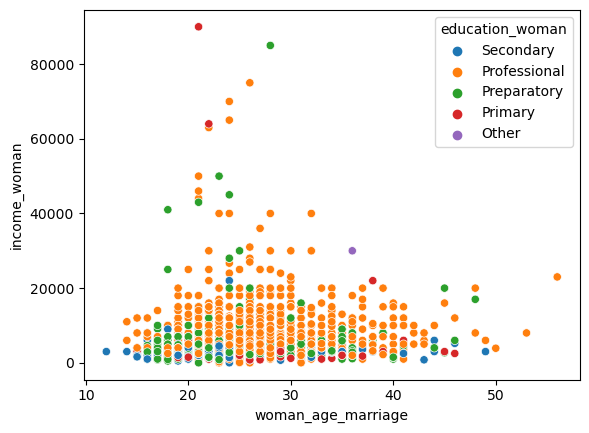

In [16]:
# Create the scatter plot
sns.scatterplot(data=divorce, x='woman_age_marriage', y='income_woman', hue='education_woman')
plt.show()

### Exploring with KDE plots

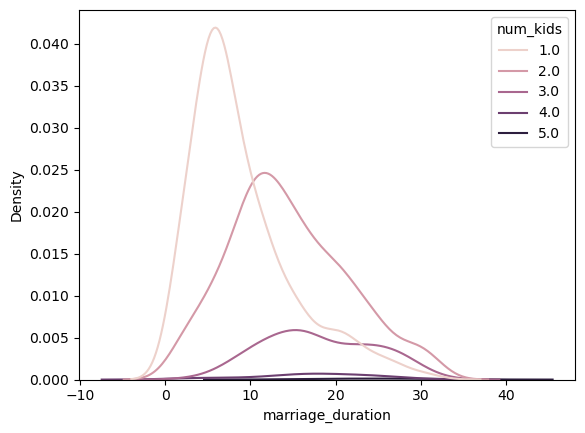

In [17]:
# Create the KDE plot
sns.kdeplot(data=divorce, x='marriage_duration', hue='num_kids')
plt.show()

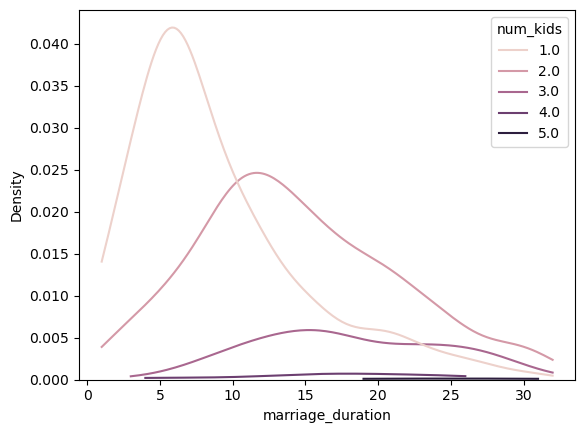

In [22]:
# Update the KDE plot so that marriage duration can't be smoothed too far
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.show()

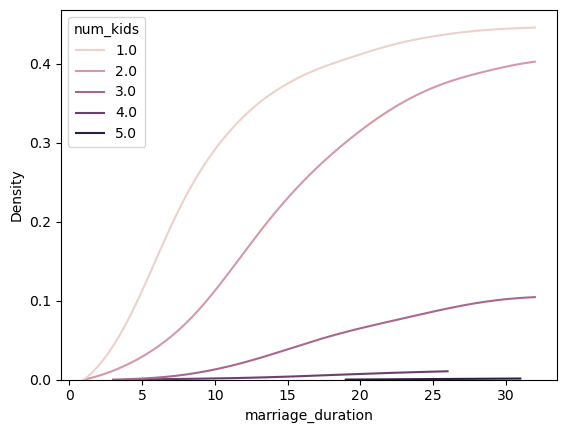

In [24]:
# Update the KDE plot to show a cumulative distribution function
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()